In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving caso_full.csv to caso_full.csv


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
df = pd.read_csv("deputies_dataset.csv", encoding='ISO-8859-1')

In [5]:
df.head()

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014902 entries, 0 to 3014901
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   bugged_date                     int64  
 1   receipt_date                    object 
 2   deputy_id                       int64  
 3   political_party                 object 
 4   state_code                      object 
 5   deputy_name                     object 
 6   receipt_social_security_number  float64
 7   receipt_description             object 
 8   establishment_name              object 
 9   receipt_value                   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 230.0+ MB


In [7]:
df.isnull().sum()

bugged_date                            0
receipt_date                           0
deputy_id                              0
political_party                        0
state_code                             0
deputy_name                            0
receipt_social_security_number    520952
receipt_description                    0
establishment_name                     0
receipt_value                          0
dtype: int64

In [8]:
df['political_party'].value_counts()

PT                       475789
PMDB                     407598
PSDB                     298030
PP                       257487
PR                       205635
PSB                      189890
PSD                      189624
DEM                      179492
PDT                      102012
PTB                       84951
SD                        81638
PCDOB                     78881
PRB                       77787
PV                        61800
PPS                       56616
PSC                       52108
PROS                      35425
PODE                      35272
PSOL                      28669
PHS                       26448
AVANTE                    19759
REDE                      14337
PEN                       13890
PSL                       10909
S.PART.                    9290
PMN                        6620
PRP                        4279
PTC                        3693
SEM PARTIDO ASSOCIADO      3563
PTDOB                      2932
PRTB                        254
PSDC    

In [9]:
df.shape

(3014902, 10)

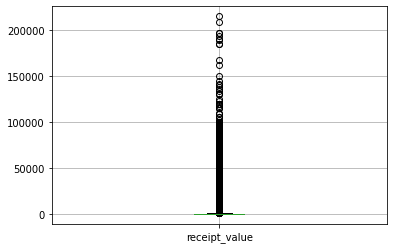

In [10]:
df.boxplot(['receipt_value'])

In [11]:
df['deputy_name'].value_counts()

Vanderlei Macris       15987
Jorge Tadeu Mudalen    15590
Henrique Fontana       13707
Celso Maldaner         11973
Eduardo Barbosa        11480
                       ...  
Athos Avelino              1
AdÃ£o Pretto               1
Juvenil                    1
Jusmari Oliveira           1
SebastiÃ£o Madeira         1
Name: deputy_name, Length: 1187, dtype: int64

In [12]:
df.query('receipt_value > 100000')

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value
34364,0,2013-12-27 00:00:00,292,PTB,SP,Arnaldo Faria De SÃ¡,5.511195e+12,Dissemination of the Parliamentary Activity.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,197370
314823,0,2013-12-10 00:00:00,1688,PP,GO,Sandes JÃºnior,1.013775e+12,Dissemination of the Parliamentary Activity.,L. L. GRAFICA E EDITORA LTDA,120000
390710,0,2014-12-19 00:00:00,292,PTB,SP,Arnaldo Faria De SÃ¡,5.445071e+13,Dissemination of the Parliamentary Activity.,GRÃFICA TRÃS PONTAS,208320
393528,0,2014-12-17 00:00:00,2377,PP,AL,Arthur Lira,8.737947e+12,Dissemination of the Parliamentary Activity.,INDUSTRIA GRAFICA E EDITORA MARAVILHA LTDA ME,117500
410335,0,2014-10-23 00:00:00,1593,SD,ES,Carlos Manato,1.779867e+13,Dissemination of the Parliamentary Activity.,V C F DA SILVA GRAFICA -ME,130000
424242,0,2014-12-30 00:00:00,1594,DEM,AP,Davi Alcolumbre,3.800663e+13,Dissemination of the Parliamentary Activity.,PARNAIBA GRAFICA EDITORA,136000
448832,0,2014-12-30 17:16:43,1822,PP,PE,Eduardo Da Fonte,NaN,Postal Services,CORREIOS - MALA DIRETA POSTAL BÃSICA,110400
454701,0,2014-12-29 00:00:00,1018,PDT,RS,Enio Bacci,7.788325e+12,Dissemination of the Parliamentary Activity.,Porto Novo,124800
465020,0,2014-11-14 00:00:00,2307,PDT,BA,FÃ©lix MendonÃ§a JÃºnior,3.386766e+13,Dissemination of the Parliamentary Activity.,CONTRASTE EDITORA E INDUSTRIA GRAFICA,140000
467864,0,2014-12-10 00:00:00,1835,PSC,RJ,Filipe Pereira,6.332678e+12,Dissemination of the Parliamentary Activity.,INTERQUALITY GRÃFICA E EDITORA LTDA ME,133604


In [13]:
df.query('receipt_value > 10000 & deputy_name == "Jorge Tadeu Mudalen"')

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value
877215,0,2011-09-19 00:00:00,763,DEM,SP,Jorge Tadeu Mudalen,2.012862e+12,Airline tickets,Cia AÃ©rea - TAM,19005
1918784,0,2017-05-17 00:00:00,763,DEM,SP,Jorge Tadeu Mudalen,5.954659e+12,Dissemination of the Parliamentary Activity.,CENASET PRODUTORA LTDA-ME,16000
2212189,0,2010-12-30 00:00:00,763,DEM,SP,Jorge Tadeu Mudalen,2.012862e+12,Airline tickets,Cia AÃ©rea - TAM,10056
2567399,0,2016-12-01 00:00:00,763,DEM,SP,Jorge Tadeu Mudalen,7.936937e+12,Dissemination of the Parliamentary Activity.,PRIMECOLORS SERVIÃOS GRAFICOS LTDA EPP,20000


In [14]:
df.query('receipt_value > 10000 & deputy_name == "Zeca Dirceu"')

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value
684615,0,2014-01-29 00:00:00,2238,PT,PR,Zeca Dirceu,1.331131e+13,Dissemination of the Parliamentary Activity.,Amplla Consultoria,11500
684616,0,2014-02-18 00:00:00,2238,PT,PR,Zeca Dirceu,1.331131e+13,Dissemination of the Parliamentary Activity.,Amplla Consultoria,11500


In [15]:
df.establishment_name.value_counts()["Amplla Consultoria"]

4

In [16]:
df.establishment_name.value_counts()

Cia AÃ©rea - GOL                                       316575
Cia AÃ©rea - TAM                                       306095
RAMAL                                                  120074
CORREIOS - SEDEX CONVENCIONAL                          110032
CELULAR FUNCIONAL                                       73732
                                                        ...  
POSTO DE SERVICOS SANTA CECILIA                             1
AUTO POSTO MEIRINHO                                         1
CONDOMINIO CIVIL DO SHOP. CENTER IGUATEMI BRASÃLIA         1
HT COMUNICAÃÃO VISUAL LTDA - EPP                          1
BSB ADVENTURE TUR EVEN. E PASSEIOS NAUT LTDA ME             1
Name: establishment_name, Length: 189118, dtype: int64

In [29]:
estado_x_partido = df.groupby(['political_party',	'state_code'])['state_code'].count().unstack('political_party').fillna(0)

In [30]:
estado_x_partido

political_party,AVANTE,DEM,PCDOB,PDT,PEN,PHS,PMDB,PMN,PODE,PP,PPS,PR,PRB,PROS,PRP,PRTB,PSB,PSC,PSD,PSDB,PSDC,PSL,PSOL,PT,PTB,PTC,PTDOB,PV,REDE,S.PART.,SD,SEM PARTIDO ASSOCIADO
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC,0.0,1654.0,3559.0,0.0,0.0,0.0,6003.0,387.0,0.0,3067.0,778.0,0.0,0.0,0.0,0.0,0.0,1490.0,1265.0,0.0,2973.0,0.0,0.0,0.0,8925.0,0.0,0.0,0.0,3979.0,0.0,0.0,0.0,0.0
AL,2763.0,0.0,0.0,1875.0,0.0,4767.0,5315.0,2233.0,1275.0,5312.0,0.0,2466.0,0.0,0.0,540.0,253.0,2397.0,1660.0,1355.0,2353.0,0.0,0.0,0.0,3855.0,2459.0,0.0,0.0,0.0,0.0,0.0,255.0,0.0
AM,0.0,4942.0,1094.0,1631.0,0.0,0.0,1719.0,0.0,0.0,2283.0,0.0,758.0,2414.0,0.0,0.0,0.0,950.0,0.0,3371.0,1592.0,0.0,9.0,0.0,3730.0,1367.0,0.0,0.0,0.0,0.0,0.0,1683.0,0.0
AP,0.0,1420.0,3861.0,1305.0,0.0,0.0,6448.0,0.0,1323.0,977.0,0.0,2626.0,0.0,0.0,0.0,0.0,3365.0,0.0,998.0,1355.0,0.0,0.0,0.0,2917.0,0.0,155.0,0.0,0.0,0.0,0.0,3999.0,0.0
BA,0.0,24808.0,14428.0,6804.0,6746.0,721.0,9365.0,0.0,2727.0,13898.0,4754.0,21425.0,11016.0,1886.0,2829.0,0.0,5702.0,1398.0,28206.0,13703.0,0.0,0.0,0.0,53468.0,1993.0,0.0,0.0,5324.0,0.0,0.0,3638.0,0.0
CE,0.0,238.0,8628.0,18301.0,0.0,0.0,12545.0,0.0,0.0,10137.0,0.0,10109.0,2743.0,1767.0,0.0,0.0,8070.0,0.0,4489.0,6323.0,0.0,0.0,0.0,18216.0,3459.0,0.0,0.0,0.0,0.0,0.0,2684.0,0.0
DF,0.0,1184.0,1.0,228.0,0.0,0.0,457.0,772.0,0.0,1739.0,0.0,2653.0,162.0,1377.0,0.0,0.0,936.0,0.0,1229.0,1971.0,0.0,0.0,0.0,4409.0,0.0,0.0,0.0,0.0,0.0,0.0,1898.0,0.0
ES,0.0,363.0,0.0,3636.0,0.0,3481.0,9890.0,0.0,0.0,1775.0,0.0,0.0,0.0,0.0,0.0,0.0,6201.0,3154.0,0.0,6639.0,0.0,0.0,0.0,6276.0,0.0,0.0,0.0,1626.0,0.0,0.0,3392.0,0.0
GO,0.0,4484.0,0.0,1778.0,0.0,0.0,16535.0,0.0,1283.0,6934.0,1931.0,5325.0,4274.0,0.0,0.0,0.0,0.0,0.0,3001.0,8530.0,0.0,0.0,0.0,6344.0,3578.0,0.0,0.0,0.0,0.0,0.0,738.0,0.0
